# 다중회귀 분석 연습문제
- 07_3.Education.csv
- 전체만족도에 영향을 미치는 변수 확인
    - 독립변수 : 교양만족도, 전공만족도, 비교과만족도
    - 종속변수 : 전체만족도
- 다중회귀 분석 수행
- 등분산성 가정
- VIF 검정
- cook distance 그래프 그려서 이상치 확인

# 다중 회귀



### 설정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [3]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## 데이터 불러오기

In [4]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 데이터

df = pd.read_csv('./data/07_3.Education.csv', encoding = 'cp949')
df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,1,1,47.6,40.5,40.0,46.7
1,1,1,33.3,35.7,33.3,33.6
2,1,1,50.0,52.4,50.0,50.4
3,1,1,35.7,28.5,40.0,36.1
4,1,1,54.7,92.8,43.3,56.2


In [6]:
# 범주형 변수 처리

df['학과'].replace({1:'학과1', 2:'학과2', 3:'학과3', 4:'학과4'}, inplace = True)
df['학과'] = df['학과'].astype('category')

df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace = True)
df['학년'] = df['학년'].astype('category')

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17268\1009550355.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['학과'].replace({1:'학과1', 2:'학과2', 3:'학과3', 4:'학과4'}, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_17268\1009550355.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,학과1,1학년,47.6,40.5,40.0,46.7
1,학과1,1학년,33.3,35.7,33.3,33.6
2,학과1,1학년,50.0,52.4,50.0,50.4
3,학과1,1학년,35.7,28.5,40.0,36.1
4,학과1,1학년,54.7,92.8,43.3,56.2


In [7]:
# 분석 변수가 여러 개일 때

num_feature = ['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도']

for num in num_feature:
    print("---", num, "---")
    results = df.groupby('학과')[num].describe().round(3)
    print(results, "\n")

--- 학과 ---
    count unique  top freq
학과                        
학과1    36      1  학과1   36
학과2    65      1  학과2   65
학과3    92      1  학과3   92
학과4    93      1  학과4   93 

--- 학년 ---
    count unique  top freq
학과                        
학과1    36      4  3학년   13
학과2    65      4  2학년   24
학과3    92      4  2학년   35
학과4    93      4  2학년   33 

--- 교양만족도 ---
     count    mean     std   min   25%   50%     75%   max
학과                                                        
학과1   36.0  50.889  19.863  14.8  38.1  47.0  64.300  83.3
학과2   65.0  52.742  18.359  14.8  42.9  50.0  64.200  83.3
학과3   92.0  47.841  15.248  16.6  39.3  47.6  52.325  85.7
학과4   93.0  50.529  16.029  14.4  42.9  50.0  57.100  83.3 

--- 전공만족도 ---
     count    mean     std   min     25%   50%    75%    max
학과                                                          
학과1   36.0  54.114  25.614  23.8  32.125  48.8  71.15  100.0
학과2   65.0  55.066  17.394  21.4  47.600  53.6  64.20   95.2
학과3   92.0  54.990  18

C:\Users\user\AppData\Local\Temp\ipykernel_17268\1442997597.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('학과')[num].describe().round(3)
C:\Users\user\AppData\Local\Temp\ipykernel_17268\1442997597.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('학과')[num].describe().round(3)
C:\Users\user\AppData\Local\Temp\ipykernel_17268\1442997597.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

In [8]:
df.columns

Index(['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도'], dtype='object')

In [9]:
column = ['교양만족도', '전공만족도', '비교과만족도'] #독립변수

formula = "전체만족도 ~ " + " + ".join(column)
formula

'전체만족도 ~ 교양만족도 + 전공만족도 + 비교과만족도'

In [10]:
y, X = dmatrices(formula,
                 data = df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [11]:
model = sm.OLS(y, X)
result = model.fit()

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체만족도   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 09 Jan 2026   Prob (F-statistic):          1.60e-122
Time:                        17:20:45   Log-Likelihood:                -894.34
No. Observations:                 286   AIC:                             1797.
Df Residuals:                     282   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9143      1.139      4.316      0.0

### coef, P>|t|로 보면

- 셋 모두 영향을 줌.

### 다중공선성 확인



In [13]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i ) for i in range(X.values.shape[1])]
vif['features'] = X.columns

print(vif.round(1))

   VIF Factor   features
0        12.0  Intercept
1         2.5      교양만족도
2         2.0      전공만족도
3         1.8     비교과만족도


## 기본 검정

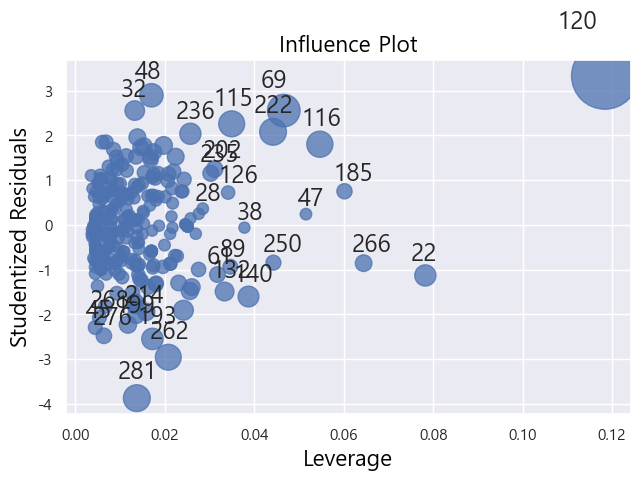

In [14]:
# cook distance를 이용한 이상치 확인

fig = sm.graphics.influence_plot(result, criterion = 'cooks')

plt.rc('font', size = 7)
fig.tight_layout(pad = 1.0)
plt.show()

In [15]:
# 등분산 검정

name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic', np.float64(11.13314950670988)),
 ('p-value', np.float64(0.011027248981137657)),
 ('f-value', np.float64(3.807356368192804)),
 ('f p-value', np.float64(0.010610627224021667))]

In [16]:
# 이상치 제거

rm_df = df.drop(120)

### 이상치 제거 후 다시 분석

In [17]:
y, x = dmatrices(formula,
                 data = rm_df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [18]:
model = sm.OLS(y, x)
result2 = model.fit()

In [19]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체만족도   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     627.8
Date:                Fri, 09 Jan 2026   Prob (F-statistic):          3.36e-124
Time:                        17:20:45   Log-Likelihood:                -886.20
No. Observations:                 285   AIC:                             1780.
Df Residuals:                     281   BIC:                             1795.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7179      1.120      4.212      0.0

전공만족도가 가장 영향을 끼침. 그 다음은 비교과만족도.

In [20]:
# 등분산 검정

name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result2.resid, result2.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic', np.float64(8.582056237181718)),
 ('p-value', np.float64(0.03539609142161998)),
 ('f-value', np.float64(2.908105711011431)),
 ('f p-value', np.float64(0.035001556720024786))]

등분산 기각이지만 등분산이라고 가정

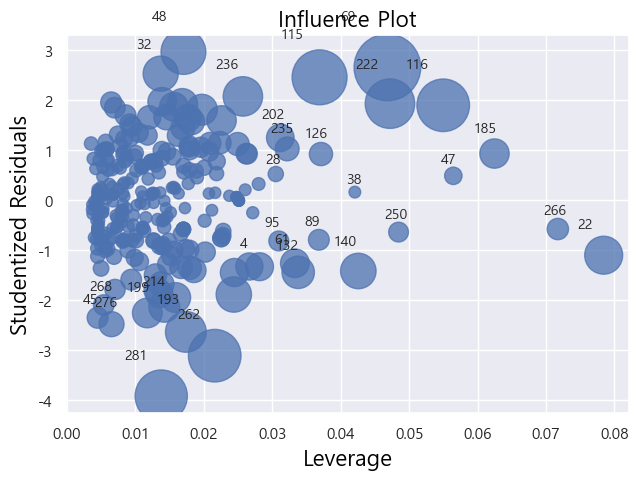

In [22]:
# cook distance를 이용한 이상치 확인

fig = sm.graphics.influence_plot(result2, criterion = 'cooks')

plt.rc('font', size = 7)
fig.tight_layout(pad = 1.0)
plt.show()